In [101]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [102]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [103]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [104]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
market_data_scaled = scaler.fit_transform(market_data_df)


In [105]:
# Create a DataFrame with the scaled data
market_data_scaled_df = pd.DataFrame(market_data_scaled, columns=market_data_df.columns)

# Copy the crypto names from the original data
market_data_scaled_df['coin_id'] = market_data_df.index

# Set the coin_id column as index
market_data_scaled_df.set_index('coin_id', inplace=True)

# Display sample data
market_data_scaled_df.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [106]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = range(1, 11)

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=1, n_init='auto')
    # 2. Fit the model to the data using the scaled DataFrame
    kmeans.fit(market_data_scaled_df)
    # 3. Append the model.inertia_ to the inertia list
    inertia.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_df


,k,inertia
0,1,287.000000
1,2,212.123342
2,3,145.897940
3,4,131.457370
4,5,66.317106
5,6,57.402668
6,7,49.212644
7,8,44.799804
8,9,33.859468
9,10,29.250314


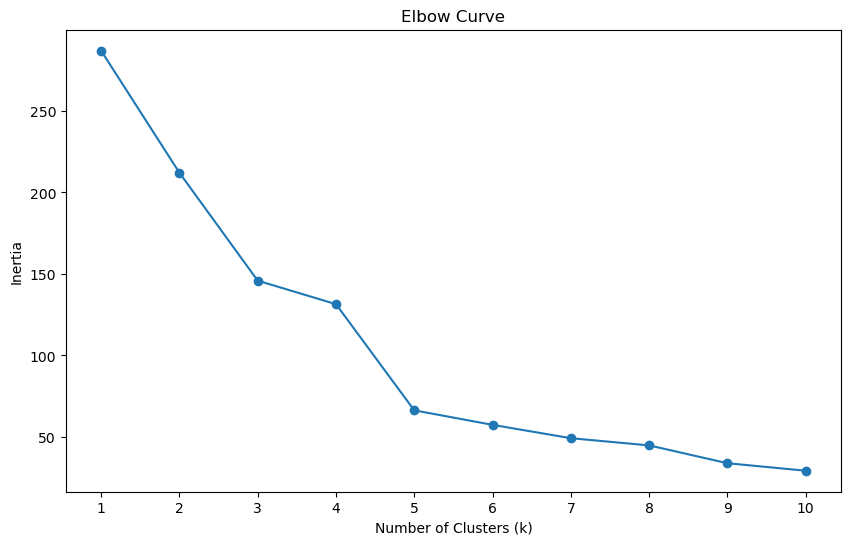

In [107]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(elbow_df["k"], elbow_df["inertia"], marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.show()


#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** k = 5

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [108]:
# Initialize the K-means model with the best value for k
kmeans = KMeans(n_clusters=5, random_state=1, n_init='auto')

In [109]:
# Fit the K-means model using the original scaled DataFrame
kmeans.fit(market_data_scaled_df)

KMeans(n_clusters=5, n_init='auto', random_state=1)

In [110]:
# Predict the clusters to group the cryptocurrencies
clusters = kmeans.predict(market_data_scaled_df)

# View the resulting array of cluster values
clusters


array([1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 0, 2, 2, 1, 2, 2, 2, 2, 1, 2, 0, 1,
       2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 3, 2, 0, 0, 4, 0, 2, 2, 0],
      dtype=int32)

In [111]:
# Create a copy of the DataFrame
market_data_clustered_df = market_data_scaled_df.copy()

In [112]:
# Add a new column to the DataFrame with the predicted clusters
market_data_clustered_df['cluster'] = clusters

# Display sample data
market_data_clustered_df.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,1
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,1
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,2
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,2
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,1


<Axes: title={'center': 'Cryptocurrency Clusters'}, xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

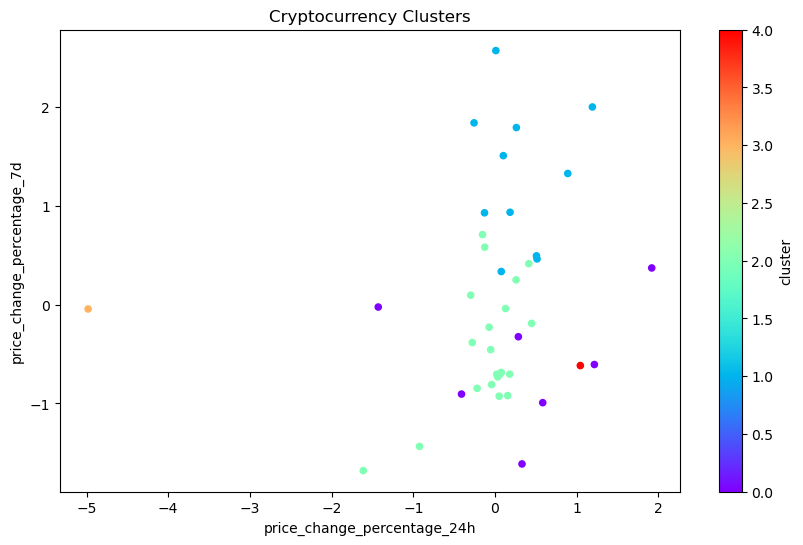

In [113]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
market_data_clustered_df.plot.scatter(
    x='price_change_percentage_24h', 
    y='price_change_percentage_7d', 
    c='cluster', 
    colormap='rainbow', 
    figsize=(10, 6), 
    title='Cryptocurrency Clusters'
)


### Optimize Clusters with Principal Component Analysis.

In [114]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)


In [115]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
market_data_pca = pca.fit_transform(market_data_scaled_df)

# View the first five rows of the DataFrame. 
market_data_pca_df.head()


,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [116]:
# Retrieve the explained variance to determine how much information can be attributed to each principal component
explained_variance = pca.explained_variance_ratio_

# Display the explained variance
explained_variance


array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 
The total explained variance is:

0.3719856+0.34700813+0.17603793=0.89503166

So, the three principal components together explain approximately 89.5% of the variance in the data.

In [117]:
# Creating a DataFrame with the PCA data
market_data_pca_df = pd.DataFrame(
    market_data_pca,
    columns=['PC1', 'PC2', 'PC3']
)

# Copy the crypto names from the original data
market_data_pca_df['coin_id'] = market_data_scaled_df.index

# Set the coin_id column as index
market_data_pca_df.set_index('coin_id', inplace=True)

# Display sample data
market_data_pca_df.head(10)


,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


### Find the Best Value for k Using the PCA Data

In [118]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = range(1, 11)

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=1, n_init='auto')
    # 2. Fit the model to the data using PCA DataFrame.
    kmeans.fit(market_data_pca_df)
    # 3. Append the model.inertia_ to the inertia list
    inertia.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {"k": k_values, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df_pca = pd.DataFrame(elbow_data_pca)

# Display the DataFrame
elbow_df_pca


,k,inertia
0,1,256.874086
1,2,168.811896
2,3,115.918077
3,4,49.665497
4,5,39.094217
5,6,27.961695
6,7,24.462735
7,8,19.451747
8,9,13.755814
9,10,13.119661


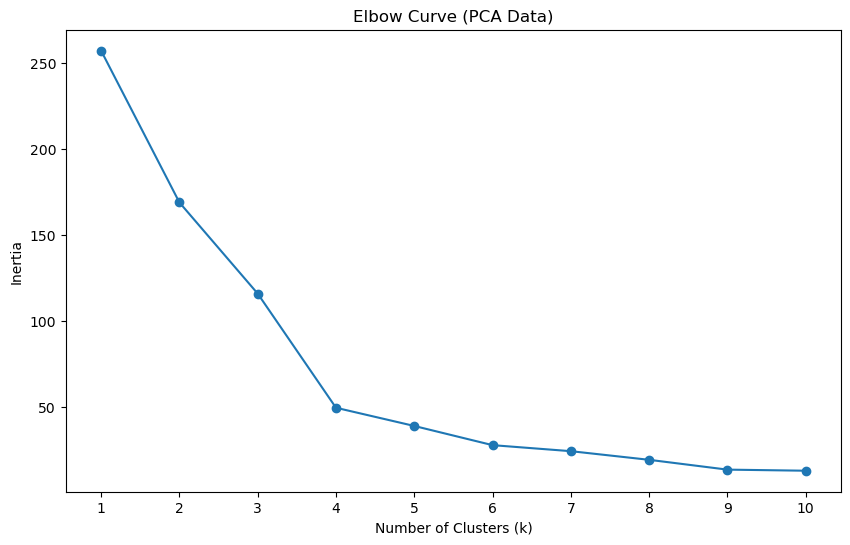

In [119]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(elbow_df_pca["k"], elbow_df_pca["inertia"], marker='o')
plt.title('Elbow Curve (PCA Data)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.show()


#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 
  k=4

* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** 
  Yes, the best value for k found using the original data was 5, while using the PCA data, it is 4.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [120]:
# Initialize the K-Means model using the best value for k
kmeans_pca = KMeans(n_clusters=4, random_state=1, n_init='auto')

In [121]:
# Fit the K-Means model using the PCA data
kmeans_pca.fit(market_data_pca_df)

KMeans(n_clusters=4, n_init='auto', random_state=1)

In [122]:
# Predict the clusters to group the cryptocurrencies using the PCA data
clusters_pca = kmeans_pca.predict(market_data_pca_df)

# Print the resulting array of cluster values.
print(clusters_pca)

[1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 2 1 0 0 3
 0 0 0 0]


In [123]:
# Create a copy of the DataFrame with the PCA data
market_data_pca_clustered_df = market_data_pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
market_data_pca_clustered_df['cluster'] = clusters_pca

# Display sample data
market_data_pca_clustered_df.head()


,PC1,PC2,PC3,cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,1
ethereum,-0.458261,0.458466,0.952877,1
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,1


In [127]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`
import hvplot.pandas

market_data_pca_clustered_df.hvplot.scatter(
    x='PC1', 
    y='PC2', 
    c='cluster', 
    colormap='rainbow', 
    title='Cryptocurrency Clusters (PCA Data)'
)


:Scatter   [PC1]   (PC2,cluster)

### Determine the Weights of Each Feature on each Principal Component

In [128]:
# Use the columns from the original scaled DataFrame as the index.
feature_weights = pd.DataFrame(pca.components_.T, index=market_data_scaled_df.columns, columns=['PC1', 'PC2', 'PC3'])

# Display sample data
feature_weights.head()


,PC1,PC2,PC3
price_change_percentage_24h,-0.416728,0.358162,-0.218795
price_change_percentage_7d,-0.102432,0.227432,0.787670
price_change_percentage_14d,-0.009162,0.540415,0.349534
price_change_percentage_30d,0.191523,0.562182,-0.181744
price_change_percentage_60d,0.320365,0.434040,-0.361377


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 

PC1:
Negative influence: price_change_percentage_24h
Positive influence: price_change_percentage_60d

PC2:
Positive influence: price_change_percentage_14d, price_change_percentage_30d

PC3:
Negative influence: price_change_percentage_60d
Positive influence: price_change_percentage_7d
    

In [129]:
#Further Analysis


In [130]:
# Filter the DataFrame to show clusters with positive long-term growth
positive_long_term_cluster = market_data_pca_clustered_df[market_data_pca_clustered_df['PC1'] > 0]

# Display these clusters
positive_long_term_cluster


,PC1,PC2,PC3,cluster
coin_id,,,,
monero,0.060499,2.909404,1.498571,1
okb,0.064075,-1.269825,-1.098829,0
nem,0.608974,0.563532,-1.148742,0
theta-token,2.676868,-0.013954,-1.965207,0
ethlend,8.089018,-3.896891,2.301382,2
havven,0.865762,-2.261882,0.275583,0
omisego,0.111675,0.428316,-1.205398,0
celsius-degree-token,4.792395,6.767679,-1.986985,3


In [131]:
# Filter the DataFrame to show clusters with positive short-term and mid-term growth
positive_short_mid_term_cluster = market_data_pca_clustered_df[(market_data_pca_clustered_df['PC2'] > 0) & (market_data_pca_clustered_df['PC3'] > 0)]

# Display these clusters
positive_short_mid_term_cluster


,PC1,PC2,PC3,cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,1
ethereum,-0.458261,0.458466,0.952877,1
bitcoin-cash,-1.157800,2.041209,1.859715,1
binancecoin,-0.516534,1.388377,0.804071,1
chainlink,-0.450711,0.517699,2.846143,1
cardano,-0.345600,0.729439,1.478013,1
litecoin,-0.649468,0.432165,0.600303,1
monero,0.060499,2.909404,1.498571,1
cosmos,-0.306272,0.703415,1.714224,1


In [132]:
# Find common cryptocurrencies in both positive long-term and short/mid-term clusters
potential_investments = positive_long_term_cluster.index.intersection(positive_short_mid_term_cluster.index)

# Display potential investments
potential_investments


Index(['monero'], dtype='object', name='coin_id')